# Python scripts to load and visualize MRI Classification and segmentation datasets

In [1]:
!pip install -U datasets

## 1. Python script to load and visualize an MRI classification dataset(with train, test, validation data)

In [7]:
from huggingface_hub import login
import os
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset, Dataset
from PIL import Image

login(token='Your HuggingFace Token')
dataset = load_dataset("akar49/MRI_3TumorClassification")

README.md:   0%|          | 0.00/562 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/65.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/18.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2521 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/684 [00:00<?, ? examples/s]

In [8]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2521
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 684
    })
})


In [9]:
## Get the label names from the dataset
labels = dataset["train"].features["label"].names
label2id, id2label = dict(), dict()

# Create mappings between label names and indices
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

# Print the label names corresponding to indices 0 and 1
print(id2label[str(0)], id2label[str(1)],id2label[str(2)],id2label[str(3)])

glioma_tumor meningioma_tumor no_tumor pituitary_tumor


Text(0.5, 1.0, 'Test image label: 0=glioma_tumor')

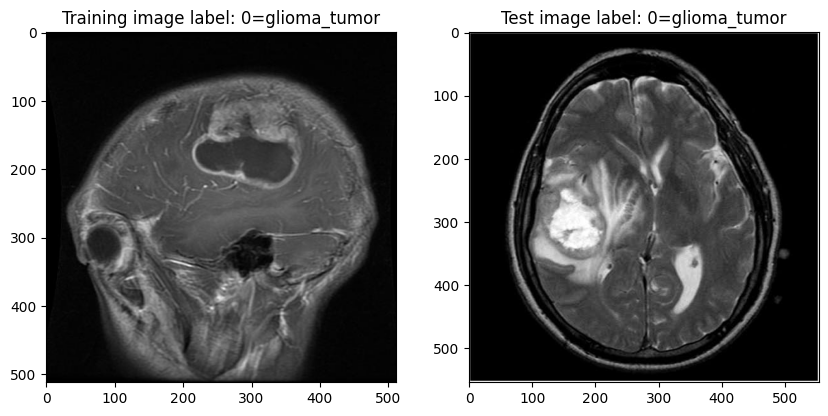

In [10]:
3# Extract images and labels from the dataset
i= 10
j= 20
trimg = dataset['train'][i]['image']
lab1 = dataset['train'][i]['label']
teimg = dataset['test'][j]['image']
lab2 = dataset['test'][j]['label']

# Create a figure to display training and test images with labels
fig = plt.figure(figsize=(10, 10))

# Display training image and label
ax1 = fig.add_subplot(221)
ax1.imshow(trimg, cmap='gray')
ax1.set_title('Training image label: ' + str(lab1) + '=' + id2label[str(lab1)])

# Display test image and label
ax2 = fig.add_subplot(222)
ax2.imshow(teimg, cmap='gray')
ax2.set_title('Test image label: ' + str(lab2) + '=' + id2label[str(lab2)])

## 2. Python script to load the MRI segmentation dataset (with train, test, validation data)
### Checkpoints for downloading the three tumor datasets:
* ### akar49/MRI_Seg_Meningioma
* ### akar49/MRI_Seg_Glioma
* ### akar49/MRI_Seg_Pituitary

### Function to load dataset:
### dataset = load_dataset("username/dataset_name")

In [2]:
from huggingface_hub import login
import os
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset, Dataset
from PIL import Image

login(token='Your HuggingFace Token')
dataset = load_dataset("akar49/MRI_Seg_Pituitary")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/685 [00:00<?, ?B/s]

(…)-00000-of-00001-fec5ee536cf311b0.parquet:   0%|          | 0.00/94.7M [00:00<?, ?B/s]

(…)-00000-of-00001-32080a60cf9accde.parquet:   0%|          | 0.00/50.1M [00:00<?, ?B/s]

(…)-00000-of-00001-755842a36c5750e0.parquet:   0%|          | 0.00/23.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/560 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/294 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/140 [00:00<?, ? examples/s]

In [3]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 560
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 294
    })
    val: Dataset({
        features: ['image', 'label'],
        num_rows: 140
    })
})


In [4]:
def visualize_data(dataset, num_samples=10):
    indices = np.random.choice(len(dataset), num_samples, replace=False).tolist()

    fig, axarr = plt.subplots(2, num_samples, figsize=(20, 5))

    for i, idx in enumerate(indices):
        sample = dataset[idx]

        image = sample["image"]
        mask = sample["label"]

        axarr[0, i].imshow(image)
        axarr[0, i].axis('off')

        axarr[1, i].imshow(mask, cmap='gray')
        axarr[1, i].axis('off')

        axarr[0, i].set_title(f'Image #{idx}')
        axarr[1, i].set_title(f'label #{idx}')

    plt.tight_layout()
    plt.show()

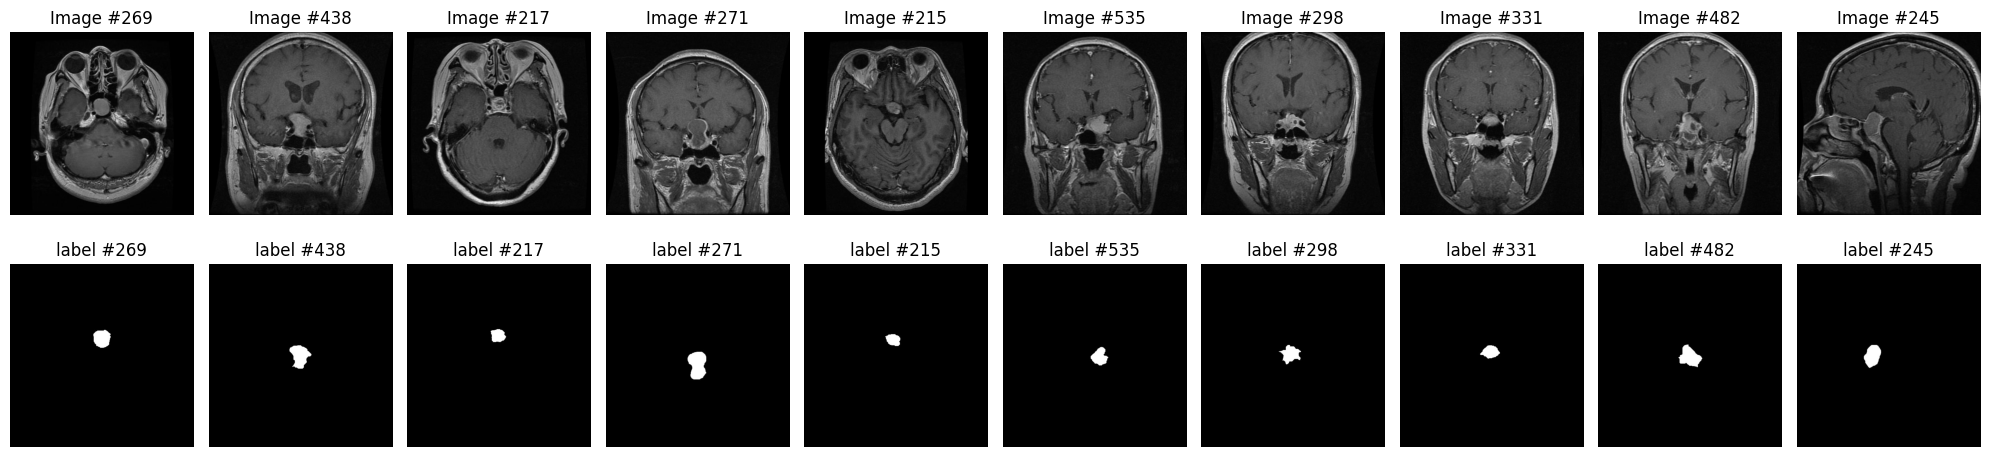

In [5]:
visualize_data(dataset['train'])